In [1]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python
# Install dependencies
!apt-get update
!apt-get install -y cmake g++ wget unzip

# Download OpenCV and OpenCV Contrib (if you want extra modules)
!wget -q -O opencv.zip https://github.com/opencv/opencv/archive/4.x.zip
!unzip -q opencv.zip
!mkdir -p opencv-4.x/build
!mkdir -p /content/custom_cv2
%cd opencv-4.x/build
# Configure with specific modules and optimized settings
!cmake -D CMAKE_BUILD_TYPE=Debug \
    -D CMAKE_INSTALL_PREFIX=/usr/local \
    -D INSTALL_PYTHON_EXAMPLES=OFF \
    -D INSTALL_C_EXAMPLES=OFF \
    -D BUILD_EXAMPLES=OFF \
    -D BUILD_TESTS=OFF \
    -D BUILD_PERF_TESTS=OFF \
    -D BUILD_DOCS=OFF \
    -D BUILD_opencv_python3=ON \
    -D PYTHON_DEFAULT_EXECUTABLE=$(which python3) \
    -D BUILD_opencv_features2d=ON \
    -D BUILD_opencv_calib3d=ON \
    -D BUILD_opencv_imgproc=ON \
    -D BUILD_opencv_core=ON \
    -D BUILD_opencv_imgcodecs=ON \
    -D BUILD_opencv_highgui=ON \
    -D BUILD_opencv_videoio=OFF \
    -D BUILD_opencv_objdetect=OFF \
    -D BUILD_opencv_photo=OFF \
    -D BUILD_opencv_flann=ON \
    -D BUILD_opencv_ml=OFF \
    -D BUILD_opencv_gapi=OFF \
    -D BUILD_opencv_video=OFF \
    -D OPENCV_ENABLE_NONFREE=ON \
    -D OPENCV_GENERATE_PKGCONFIG=ON \
    -D WITH_PROTOBUF=OFF \
    -D BUILD_PROTOBUF=OFF \
    -D WITH_GSTREAMER=OFF \
    -D WITH_FFMPEG=OFF \
    -D WITH_OPENCL=OFF \
    -D WITH_CUDA=OFF \
    -D WITH_GTK=OFF \
    -D WITH_QT=OFF \
    -D WITH_DEBUG=ON \
    ..

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease

In [8]:
%cd /content/opencv-4.x/build
!make gen_opencv_python_source
!make -j8
!make install

/content/opencv-4.x/build
Built target gen_opencv_python_source
[  0%] Built target opencv_dnn_plugins
[  1%] Built target ittnotify
[  1%] Built target opencv_highgui_plugins
[  1%] Built target opencv_videoio_plugins
[  1%] Built target gen-pkgconfig
[  1%] Built target gen_opencv_python_source
[  6%] Built target ippiw
[ 27%] Built target opencv_core
[ 27%] Built target opencv_flann
[ 28%] Built target opencv_version
[ 45%] Built target opencv_imgproc
[ 51%] Built target opencv_imgcodecs
[ 52%] Building CXX object modules/features2d/CMakeFiles/opencv_features2d.dir/src/orb.cpp.o
[ 53%] Built target opencv_highgui
[ 81%] Built target opencv_dnn
[ 81%] Built target opencv_model_diagnostics
[ 81%] Linking CXX shared library ../../lib/libopencv_features2d.so
[ 86%] Built target opencv_features2d
[ 86%] Linking CXX shared library ../../lib/libopencv_calib3d.so
[ 95%] Built target opencv_calib3d
[ 95%] Linking CXX shared library ../../lib/libopencv_stitching.so
[ 98%] Built target opencv_

In [1]:
# Copy the built module to the correct location
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python
!rm -rf /usr/local/lib/python3.10/dist-packages/cv2*
!cp /content/opencv-4.x/build/lib/python3/cv2.cpython-310-x86_64-linux-gnu.so /content/custom_cv2/cv2.so

import sys
sys.path.insert(0, '/content/custom_cv2')  # Prioritize the custom OpenCV path

import cv2
print(cv2.__file__)       # Should show /content/custom_cv2/cv2.so
print(cv2.__version__)

# Basic functionality test
import numpy as np

def test_opencv_modules():
    # Test core functionality
    try:
        img = np.zeros((100, 100), dtype=np.uint8)
        print("✓ Core module working (numpy array creation)")
    except Exception as e:
        print("✗ Core module error:", str(e))

    # Test imgcodecs
    try:
        cv2.imwrite('test.jpg', img)
        loaded = cv2.imread('test.jpg')
        print("✓ Imgcodecs module working (imread/imwrite)")
    except Exception as e:
        print("✗ Imgcodecs module error:", str(e))

    # Test features2d
    try:
        sift = cv2.SIFT_create()
        print("✓ Features2d module working (SIFT creation)")
    except Exception as e:
        print("✗ Features2d module error:", str(e))

    # Test imgproc
    try:
        blurred = cv2.GaussianBlur(img, (5,5), 0)
        print("✓ Imgproc module working (GaussianBlur)")
    except Exception as e:
        print("✗ Imgproc module error:", str(e))

    # Test FLANN
    try:
        index_params = dict(algorithm=0, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        print("✓ FLANN module working (matcher creation)")
    except Exception as e:
        print("✗ FLANN module error:", str(e))

print("\nTesting OpenCV modules:")
test_opencv_modules()

/content/custom_cv2/cv2.so
4.10.0-dev

Testing OpenCV modules:
✓ Core module working (numpy array creation)
✓ Imgcodecs module working (imread/imwrite)
✓ Features2d module working (SIFT creation)
✓ Imgproc module working (GaussianBlur)
✓ FLANN module working (matcher creation)


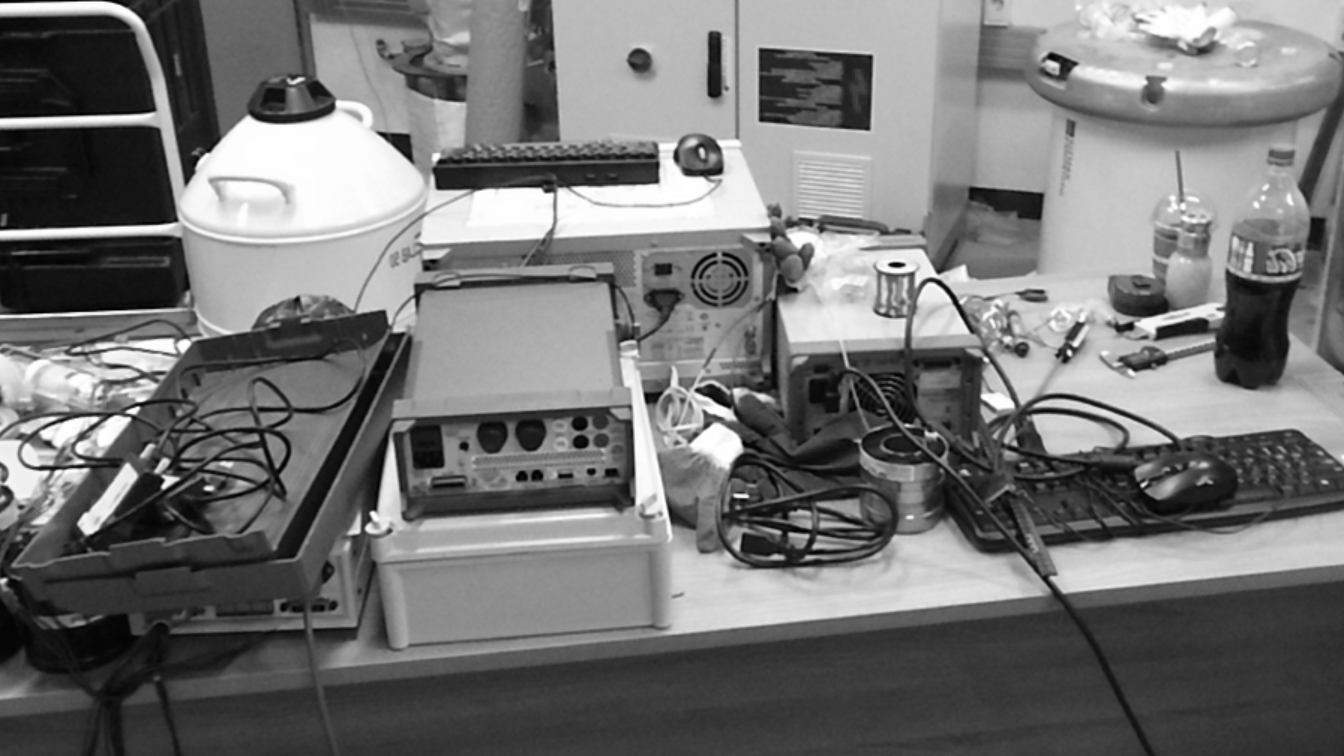

In [2]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def Estimate_homography(keypoints_1, keypoints_2, matches):
    """Matches를 기반으로 Homography 추정하는 함수"""
    if len(matches) < 4:
        return None

    # src_pts_는 첫번째 이미지의 keypoint 픽셀, dst_pts_는 두번째 이미지의 keypoint 픽셀, 이 좌표들을 통해 첫번째 이미지의 평면을 두번째 이미지의 평면으로 변환
    src_pts_ = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts_ = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Calculate homography matrix using RANSAC
    H_, mask_ = cv2.findHomography(src_pts_, dst_pts_, cv2.RANSAC, 3.0)
    return H_, mask_, src_pts_, dst_pts_


def Apply_Homography(keypoints, H):
    #Apply the Homography matrix to the given keypoints.

    # Convert keypoints to homogeneous coordinates
    pts = np.float32([kp.pt for kp in keypoints]).reshape(-1, 1, 2)

    # Apply the Homography matrix
    transformed_pts = cv2.perspectiveTransform(pts, H)

    return transformed_pts[:, 0, :]

def Apply_Inverse_Homography(keypoints, H):
    """Apply the inverse Homography matrix to the given keypoints."""
    # Compute inverse of Homography matrix
    H_inv = np.linalg.inv(H)

    # Convert keypoints to homogeneous coordinates
    pts = np.float32([kp.pt for kp in keypoints]).reshape(-1, 1, 2)

    # Apply the inverse Homography matrix
    transformed_pts = cv2.perspectiveTransform(pts, H_inv)

    return transformed_pts[:, 0, :]


def Calculate_Repeatability_Homography(keypoints_1, keypoints_2, H, distance_threshold=3.0):
    """Reference(keypoints_1)와 Test Keypoints(keypoints_2) 간 repeatability 계산 (Inverse Homography 적용)"""
    if len(keypoints_1) == 0 or len(keypoints_2) == 0:
        return 0.0

    # Test image의 keypoints를 Reference image 좌표계로 변환
    transformed_pts2 = Apply_Inverse_Homography(keypoints_2, H)
    pts1 = np.float32([kp.pt for kp in keypoints_1])

    repeatable_points = 0

    # Check for repeatable points using transformed test keypoints
    for pt2 in transformed_pts2:
        distances = np.linalg.norm(pts1 - pt2, axis=1)
        if np.min(distances) < distance_threshold:
            repeatable_points += 1

    repeatability = (repeatable_points / len(pts1)) * 100
    return repeatability


def Calculate_scale_space_Repeatability_Homography(keypoints_1, keypoints_2, H, distance_threshold=3.0):
    """Scale space를 고려한 Repeatability 계산 (Inverse Homography 적용)"""
    if len(keypoints_1) == 0 or len(keypoints_2) == 0:
        return 0.0

    ss_repeatable_points = 0

    # Test image의 keypoints를 Reference image 좌표계로 변환
    transformed_pts2 = Apply_Inverse_Homography(keypoints_2, H)

    for idx, kp2 in enumerate(keypoints_2):
        pt2 = transformed_pts2[idx]
        size2 = kp2.size

        for kp1 in keypoints_1:
            pt1 = np.array(kp1.pt)
            size1 = kp1.size

            spatial_dist = np.linalg.norm(pt1 - pt2)
            scale_ratio = min(size1, size2) / max(size1, size2)

            if spatial_dist < distance_threshold and scale_ratio > 0.8:
                ss_repeatable_points += 1
                break

    ss_repeatability = (ss_repeatable_points / len(keypoints_2)) * 100
    return ss_repeatability


def Calculate_metrics_Homography(keypoints_1, keypoints_2, matches, H, reference_img, test_img, detection_time, matching_time, distance_threshold=3.0):
    """Homography 기반 Evaluation metric 계산 (Inverse Homography 적용)"""
    if H is None:
        H, _, _, _ = Estimate_homography(keypoints_1, keypoints_2, matches)

    # Matches Percentage 계산
    total_possible_matches = min(len(keypoints_1), len(keypoints_2))
    matches_percentage = (len(matches) / total_possible_matches) * 100

    # Test image의 matched keypoints를 Reference image 좌표계로 변환
    test_points = np.float32([keypoints_2[m.trainIdx].pt for m in matches])
    transformed_test_points = Apply_Inverse_Homography([keypoints_2[m.trainIdx] for m in matches], H)
    reference_points = np.float32([keypoints_1[m.queryIdx].pt for m in matches])

    # Correct Matches calculation based on transformed points
    point_distances = np.linalg.norm(transformed_test_points - reference_points, axis=1)
    correct_matches = point_distances < distance_threshold
    correct_matches_count = np.sum(correct_matches)

    # Precision, Recall, and F1 Score
    precision = (correct_matches_count / len(matches)) * 100 if len(matches) > 0 else 0
    recall = (correct_matches_count / len(keypoints_1)) * 100 if len(keypoints_1) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Average localization error
    avg_localization_error = np.mean(point_distances) if len(point_distances) > 0 else float('inf')

    # Repeatability calculations
    repeatability = Calculate_Repeatability_Homography(keypoints_1, keypoints_2, H, distance_threshold)
    ss_repeatability = Calculate_scale_space_Repeatability_Homography(keypoints_1, keypoints_2, H, distance_threshold)

    # Combine metrics
    metrics = {
        'num_keypoints_reference': len(keypoints_1),
        'num_keypoints_test': len(keypoints_2),
        'num_matches': len(matches),
        'matches_percentage': matches_percentage,
        'correct_matches_percentage(precision)': precision,
        'num_correct_matches': correct_matches_count,
        'recall': recall,
        'f1_score': f1_score,
        'avg_localization_error': avg_localization_error,
        'repeatability': repeatability,
        'scale_space_repeatability': ss_repeatability,
        'detection_time_ms': detection_time * 1000,
        'matching_time_ms': matching_time * 1000,
        'total_processing_time': (detection_time + matching_time) * 1000
    }

    return metrics, correct_matches, H


def Visualize_metrics_Homography(reference_img, test_img, keypoints_1, keypoints_2, matches, correct_matches, metrics, H):
    """Evaluation metrics 시각화 (Inverse Homography 적용)"""
    plt.figure(figsize=(20, 12))

    # Plot 1: All matches
    plt.subplot(2, 2, 1)
    matched_img = cv2.drawMatches(reference_img, keypoints_1, test_img, keypoints_2, matches, None, flags=2)
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title('All Matches')

    # Plot 2: Correct matches only
    correct_matches_list = [m for i, m in enumerate(matches) if correct_matches[i]]
    plt.subplot(2, 2, 2)
    good_matched_img = cv2.drawMatches(reference_img, keypoints_1, test_img, keypoints_2, correct_matches_list, None, flags=2)
    plt.imshow(cv2.cvtColor(good_matched_img, cv2.COLOR_BGR2RGB))
    plt.title('Correct Matches')

    # Plot 3: Performance metrics
    plt.subplot(2, 2, 3)
    metric_names = ['correct_matches_percentage(precision)', 'recall', 'f1_score', 'repeatability', 'scale_space_repeatability']
    metric_values = [metrics[name] for name in metric_names]
    plt.bar(metric_names, metric_values)
    plt.title('Performance Metrics')
    plt.xticks(rotation=45)

    # Plot 4: Keypoint distribution with inverse Homography-transformed keypoints
    plt.subplot(2, 2, 4)
    # Test image의 모든 keypoints를 Reference image 좌표계로 변환
    transformed_keypoints_2 = Apply_Inverse_Homography(keypoints_2, H)

    plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
    plt.scatter([kp.pt[0] for kp in keypoints_1], [kp.pt[1] for kp in keypoints_1],
                c='g', s=20, alpha=0.5, label='Reference Keypoints')
    plt.scatter([pt[0] for pt in transformed_keypoints_2], [pt[1] for pt in transformed_keypoints_2],
                c='b', s=20, alpha=0.5, label='Transformed Test Keypoints')
    plt.legend()
    plt.title('Keypoint Distribution in Reference Image Space')

    plt.tight_layout()
    plt.show()

def Print_metrics(metrics):
    """결과 출력"""
    print("\nFeature Detection and Matching Evaluation:")
    print("="*50)

    print("\nFeature Detection Metrics:")
    print(f"Number of keypoints (Reference): {metrics['num_keypoints_reference']}")
    print(f"Number of keypoints (Test): {metrics['num_keypoints_test']}")
    print(f"Detection time: {metrics['detection_time_ms']:.2f} ms")

    print("\nMatching Metrics:")
    print(f"Total matches: {metrics['num_matches']}")
    print(f"Matches percentage: {metrics['matches_percentage']:.2f}%")
    print(f"Matching time: {metrics['matching_time_ms']:.2f} ms")

    print("\nPerformance Metrics:")
    print(f"Correct matches count: {metrics['num_correct_matches']}")
    print(f"Correct Matches percentage: {metrics['correct_matches_percentage(precision)']:.2f}%")
    print(f"Recall: {metrics['recall']:.2f}%")
    print(f"F1 Score: {metrics['f1_score']:.2f}%")
    print(f"Average localization error: {metrics['avg_localization_error']:.2f} pixels")
    print(f"Repeatability: {metrics['repeatability']:.2f}%")
    print(f"Scale-space repeatability: {metrics['scale_space_repeatability']:.2f}%")
    print(f"Total processing time: {metrics['total_processing_time']:.2f} ms")
    print("="*50)
    print("\n")

"""================================================================================================================="""

#image 설정
img1 = cv2.imread('/content/lab_2_c.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/lab_2_c.png', cv2.IMREAD_GRAYSCALE)


#Ground Truth Homography 입력(알고 있을 경우에만, Homography(기하학적 변화)가 없다면 H를 [[1,0,0],[0,1,0],[0,0,1]]로 입력, 아예 모른다면 H를 None으로 입력)
GTH = None
#GTH = np.array([[1,0,0],[0,1,0],[0,0,1]])
#GTH = np.array([[888.936371179244e-003,18.2514352297355e-003,8.97590117321321e+000],[4.65426880548969e-003,921.643538138129e-003,7.37848417972965e+000],[11.5540704210687e-006,71.2845423476733e-006,1.00068189116337e+000]])

#Brute Force Matcher
def BFMatcher_SIFT(img1, img2, keypoints_1, keypoints_2, descriptors_1, descriptors_2):

  #Brute Force Matcher 사용(SIFT에서)
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

  #BF를 활용해서 matching 진행
  start_match = time.time()
  matches = bf.match(descriptors_1, descriptors_2)
  end_match = time.time()

  match_result = sorted(matches, key = lambda x:x.distance)
  matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, match_result, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  return descriptors_1, descriptors_2, match_result, matched_img, start_match, end_match

#Brute Force Matcher at binary
def BFMatcher_bi(img1, img2, keypoints_1, keypoints_2, descriptors_1, descriptors_2):

  #Brute Force Matcher 사용(SIFT에서)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

  #BF를 활용해서 matching 진행
  start_match = time.time()
  matches = bf.match(descriptors_1, descriptors_2)
  end_match = time.time()

  match_result = sorted(matches, key = lambda x:x.distance)
  matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, match_result, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  return descriptors_1, descriptors_2, match_result, matched_img, start_match, end_match


import cv2
import numpy as np

def scale_and_crop(img, scale_factor):
    # Get original image dimensions
    original_height, original_width = img.shape

    # Calculate new dimensions
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)

    # Scale up the image
    scaled_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    # Calculate crop coordinates to return to original size
    start_y = (new_height - original_height) // 2
    start_x = (new_width - original_width) // 2

    # Crop back to original size
    cropped_img = scaled_img[start_y:start_y+original_height,
                              start_x:start_x+original_width]

    return cropped_img

# Example usage
img1 = cv2.imread('/content/lab_2_c.png', cv2.IMREAD_GRAYSCALE)
scale = 1.5


scaled_img = scale_and_crop(img1, scale)
#cv2.imwrite('scaled_cropped_image.png', scaled_img)
cv2_imshow(scaled_img)

import numpy as np
import cv2

def calculate_homography_4points(src_points, dst_points):
    """
    Calculate homography matrix from 4 point correspondences.

    Args:
        src_points: List of 4 source points [(x1,y1), (x2,y2), (x3,y3), (x4,y4)]
        dst_points: List of 4 destination points [(x1,y1), (x2,y2), (x3,y3), (x4,y4)]

    Returns:
        homography_matrix: 3x3 homography matrix
    """
    # Convert points to numpy arrays
    src_points = np.float32(src_points)
    dst_points = np.float32(dst_points)

    # Calculate homography matrix
    homography_matrix, status = cv2.findHomography(src_points, dst_points)

    return homography_matrix

def get_GTH(img, scale):
    s = scale

    original_width, original_height= img.shape

    dst_points = [
        [0, 0],     # top-left
        [original_height, 0],   # top-right
        [original_height, original_width], # bottom-right
        [0, original_width]    # bottom-left
    ]

    # Define corresponding points in destination image
    src_points = [
        [(s-1)/(2*s) * original_height, (s-1)/(2*s) * original_width],     # top-left
        [(s+1)/(2*s) * original_height, (s-1)/(2*s) * original_width],    # top-right
        [(s+1)/(2*s) * original_height, (s+1)/(2*s) * original_width],   # bottom-right
        [(s-1)/(2*s) * original_height, (s+1)/(2*s) * original_width]     # bottom-left
    ]

    # Calculate homography
    H = calculate_homography_4points(src_points, dst_points)
    # print("Homography matrix:")
    # print(H)
    return H


Use Depth


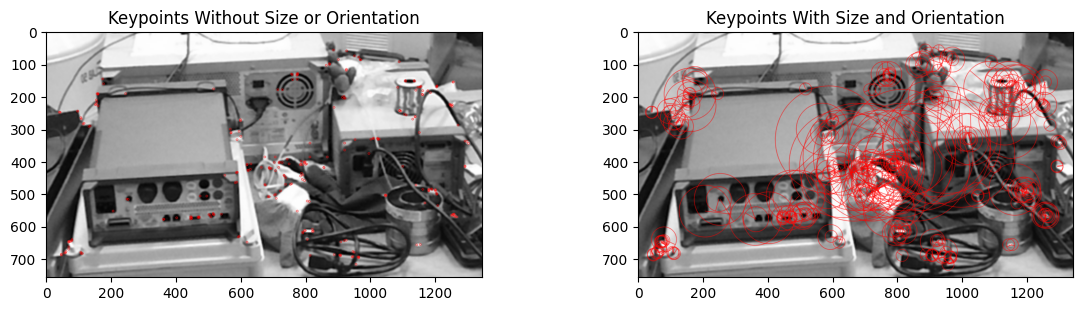


Number of keypoints Detected:  268

Without depth


In [ ]:
import cv2
import matplotlib.pyplot as plt
import copy

# Load the image
img1 = cv2.imread('lab_2_c.png', cv2.IMREAD_GRAYSCALE)
depth1 = cv2.imread('lab_2_depth_filled.png', cv2.IMREAD_GRAYSCALE)
scale = 3
img1 = scale_and_crop(img1, scale)
depth = scale_and_crop(depth1, scale)/scale

orb =  cv2.ORB_create(
    nfeatures=1000,           # 특징점의 최대 개수
    scaleFactor=1.2,         # 이미지 크기 축소 비율
    nlevels=16,               # 피라미드 레벨 수
)

keypoints, descriptor = orb.detectAndCompute(img1, depth, 0.5, None)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
keyp_without_size = copy.copy(img1)
keyp_with_size = copy.copy(img1)

cv2.drawKeypoints(img1, keypoints, keyp_without_size, color = (255, 0, 0))
cv2.drawKeypoints(img1, keypoints, keyp_with_size,  color = (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [14.0, 7.0]
# Display the image with the keypoints without size or orientation
print("\nUse Depth")
plt.subplot(221)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)
# Display the image with the keypoints with size and orientation
plt.subplot(222)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()
# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

depth = np.full_like(depth, 0.0)
keypoints, descriptor = orb.detectAndCompute(img1, depth, 2.0, None)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
keyp_without_size = copy.copy(img1)
keyp_with_size = copy.copy(img1)

cv2.drawKeypoints(img1, keypoints, keyp_without_size, color = (255, 0, 0))
cv2.drawKeypoints(img1, keypoints, keyp_with_size,  color = (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [14.0, 7.0]

print("\nWithout depth")
# Display the image with the keypoints without size or orientation
plt.subplot(223)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)
# Display the image with the keypoints with size and orientation
plt.subplot(224)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()
# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))


Use Depth


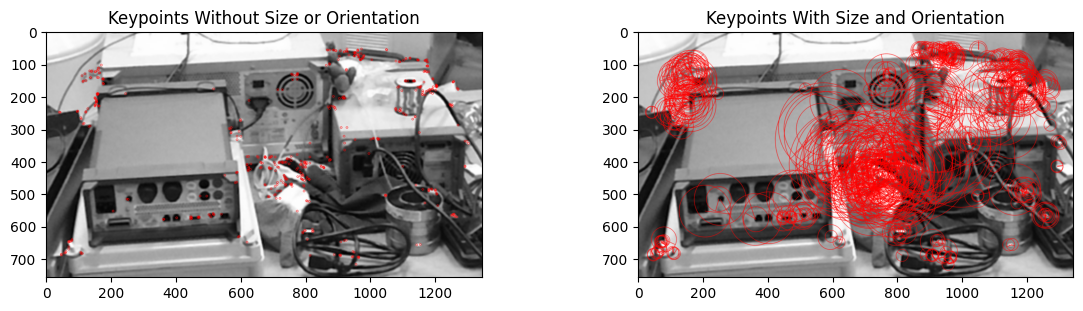


Number of keypoints Detected:  503

Without depth


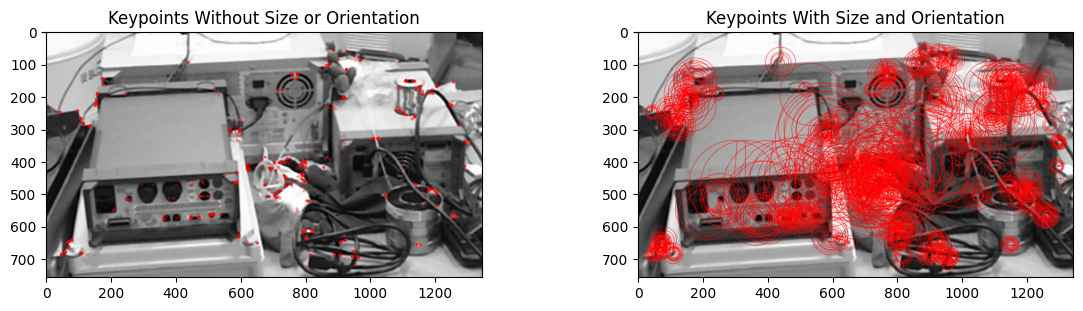


Number of keypoints Detected:  974


In [ ]:
import cv2
import matplotlib.pyplot as plt
import copy

# Load the image
image = cv2.imread('lab_2_c.png')
img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
depth = cv2.imread('lab_2_depth_filled.png', cv2.IMREAD_GRAYSCALE)

img1 = cv2.imread('lab_2_c.png', cv2.IMREAD_GRAYSCALE)
depth1 = cv2.imread('lab_2_depth_filled.png', cv2.IMREAD_GRAYSCALE)
scale = 3
img1 = scale_and_crop(img1, scale)
depth = scale_and_crop(depth1, scale)/scale



orb =  cv2.ORB_create(
    nfeatures=1000,           # 특징점의 최대 개수
    scaleFactor=1.2,         # 이미지 크기 축소 비율
    nlevels=16,               # 피라미드 레벨 수
    edgeThreshold=31,        # 경계에서 떨어진 거리
    firstLevel=0,            # 피라미드의 첫 번째 레벨
    WTA_K=2,                 # 비교할 BRIEF 패턴 개수
    scoreType=cv2.ORB_HARRIS_SCORE,  # 점수 방법 (HARRIS_SCORE 또는 FAST_SCORE)
    patchSize=31,            # 특징점 패치 크기
    fastThreshold=20         # FAST 검출기 임계값
)

#depth = np.full_like(depth, 0.0)
keypoints, descriptor = orb.detectAndCompute(img1, depth, None)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
keyp_without_size = copy.copy(img1)
keyp_with_size = copy.copy(img1)

cv2.drawKeypoints(img1, keypoints, keyp_without_size, color = (255, 0, 0))
cv2.drawKeypoints(img1, keypoints, keyp_with_size,  color = (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the image with the keypoints without size or orientation
print("\nUse Depth")
plt.subplot(221)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(222)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

import cv2
import matplotlib.pyplot as plt
import copy

# Load the image

depth = np.full_like(depth, 0.0)
keypoints, descriptor = orb.detectAndCompute(img1, depth, None)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
keyp_without_size = copy.copy(img1)
keyp_with_size = copy.copy(img1)

cv2.drawKeypoints(img1, keypoints, keyp_without_size, color = (255, 0, 0))
cv2.drawKeypoints(img1, keypoints, keyp_with_size,  color = (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



plt.rcParams['figure.figsize'] = [14.0, 7.0]

print("\nWithout depth")
# Display the image with the keypoints without size or orientation
plt.subplot(223)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(224)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

In [ ]:
import csv
import os
import time
import numpy as np
from google.colab.patches import cv2_imshow

%cd /content
orb = cv2.ORB_create(
    nfeatures=1000,           # 특징점의 최대 개수
    scaleFactor=1.2,         # 이미지 크기 축소 비율
    nlevels=8,               # 피라미드 레벨 수
)
results_file = "test.csv"

# Write the header for the CSV file
with open(results_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Header row
    writer.writerow([
        "scale", "processing_time[ms]", "matching_time[ms]", "total_time[ms]",
        "num_keypoints_reference", "num_keypoints_test",
        "num_matches", "matches_percentage",
        "correct_matches_percentage(precision)",
        "num_correct_matches", "repeatability",
    ])


iter = 1
scales = np.arange(1.0, 4.1, 0.2)

for scale in scales:
    img1 = cv2.imread('lab_2_c.png', cv2.IMREAD_GRAYSCALE)
    img2 = scale_and_crop(img1, scale)
    # depth1 = cv2.imread('lab_2_depth_filled.png', cv2.IMREAD_GRAYSCALE)
    # depth2 = scale_and_crop(depth1, scale)/scale

    img1 = cv2.resize(img1, (512, 288), interpolation=cv2.INTER_LINEAR)
    img2 = cv2.resize(img2, (512, 288), interpolation=cv2.INTER_LINEAR)
    # depth1 = cv2.resize(depth1, (512, 288), interpolation=cv2.INTER_LINEAR)
    # depth2 = cv2.resize(depth2, (512, 288), interpolation=cv2.INTER_LINEAR)
    # depth1 = np.full_like(depth1, 0.0)
    # depth = np.full_like(depth2, 0.0)
    processing_time = 0
    matching_time = 0

    for i in range(iter):
        start = time.time()
        mask = np.full_like(img1, 255)
        keypoints_1, descriptors_1 = orb.detectAndCompute(img1, mask)
        keypoints_2, descriptors_2 = orb.detectAndCompute(img2, mask)
        # keypoints_1, descriptors_1 = orb.detectAndCompute(img1, depth1, None)
        # keypoints_2, descriptors_2 = orb.detectAndCompute(img2, depth2,None)
        end = time.time()
        processing_time += end - start

        descriptors_1, descriptors_2, match_result, matched_img, start_match, end_match = BFMatcher_bi(
            img1, img2, keypoints_1, keypoints_2, descriptors_1, descriptors_2
        )
        matching_time += end_match - start_match

    processing_time = (processing_time / iter) * 1000  # Convert to ms
    matching_time = (matching_time / iter) * 1000      # Convert to ms
    total_time = processing_time + matching_time

    GTH = get_GTH(img1, scale)
    metrics, correct_matches, CH = Calculate_metrics_Homography(
        keypoints_1, keypoints_2, match_result, GTH, img1, img2, processing_time, matching_time
    )

    # Extract required metrics
    row = [
        scale,
        processing_time,
        matching_time,
        total_time,
        metrics['num_keypoints_reference'],
        metrics['num_keypoints_test'],
        metrics['num_matches'],
        metrics['matches_percentage'],
        metrics['correct_matches_percentage(precision)'],
        metrics['num_correct_matches'],
        metrics['repeatability']
    ]

    # Write the row to the CSV file
    with open(results_file, "a", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(row)

    print(f"Results for scale {scale:.2f} added to {results_file}")

/content
Results for scale 1.00 added to test.csv
Results for scale 1.20 added to test.csv
Results for scale 1.40 added to test.csv
Results for scale 1.60 added to test.csv
Results for scale 1.80 added to test.csv
Results for scale 2.00 added to test.csv
Results for scale 2.20 added to test.csv
Results for scale 2.40 added to test.csv
Results for scale 2.60 added to test.csv
Results for scale 2.80 added to test.csv
Results for scale 3.00 added to test.csv
Results for scale 3.20 added to test.csv
Results for scale 3.40 added to test.csv
Results for scale 3.60 added to test.csv
Results for scale 3.80 added to test.csv
Results for scale 4.00 added to test.csv


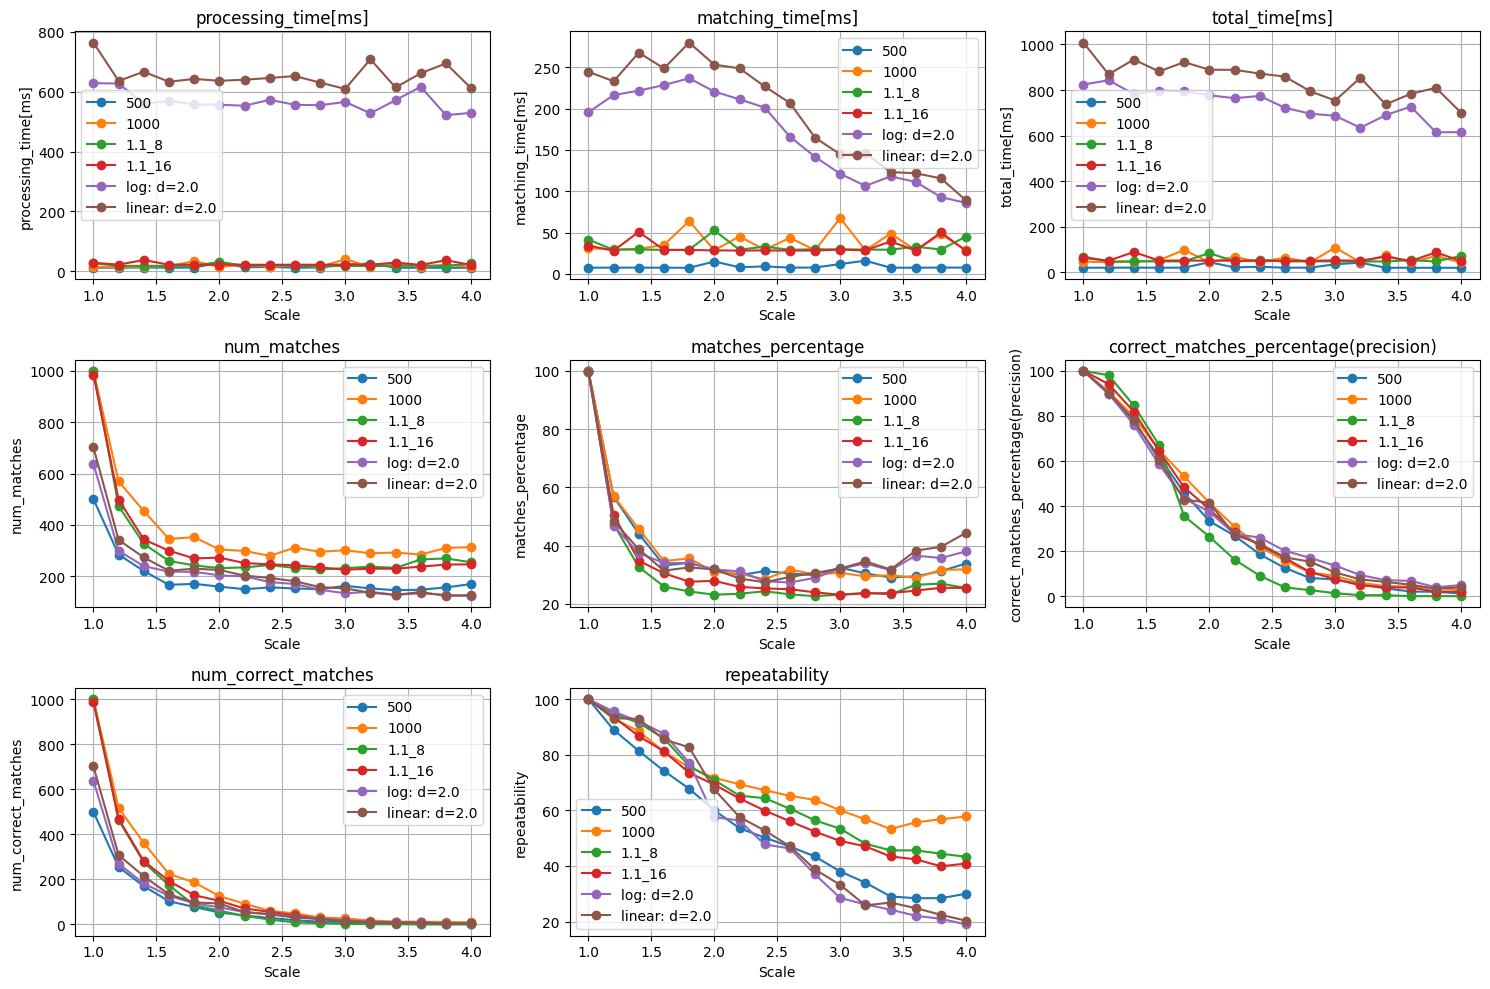

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV files and labels for each case
csv_files = ["pure_500_1.2_8.csv","pure_1000_1.2_8.csv","pure_1000_1.1_8.csv","pure_1000_1.1_16.csv"
            ,"log_d=2.0_1000_1.1_16.csv","linear_d=2.0_1000_1.1_16.csv.csv"]
labels = ["500","1000", "1.1_8", "1.1_16", "log: d=2.0", "linear: d=2.0"]

# csv_files = ["test.csv"]
# labels = ["test"]

# Columns to plot
columns_to_plot = [
    "processing_time[ms]",
    "matching_time[ms]",
    "total_time[ms]",
    # "num_keypoints_reference",
    # "num_keypoints_test",
    "num_matches",
    "matches_percentage",
    "correct_matches_percentage(precision)",
    "num_correct_matches",
    "repeatability"
]

# Create plots for each metric
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Create a grid of subplots (3 rows, 4 columns)

    # Plot each case
    for csv_file, label in zip(csv_files, labels):
        df = pd.read_csv(csv_file)
        plt.plot(df["scale"], df[column], marker='o', label=label)

    plt.xlabel("Scale")
    plt.ylabel(column)
    plt.title(column)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()
